## Implementação e aplicação do algoritmo K - Means para agrupamento de dados


## Implementação do código

### Função para gerar os centróides iniciais

Os centróides inicias são instâncias do próprio dataset escolhidos de maneira aleátoria 

In [2]:
from sklearn import datasets
import pandas as pd
import random 
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def generate_centroid(K, dataset):

	T = dataset.shape[0]
	D = dataset.shape[1]

	centroides = np.zeros((K, D))
	for i in range(K):
		k = random.randint(1, T)
		for j in range(D):
			centroides[i][j] = dataset[k][j]
	return centroides

### Função para calcular a distância entre duas intâncias

A métrica usada nessa implementação é distância euclidiana

In [4]:
def distancia_euclidiana(instanceA, instanceB):

	ans = 0
	for k in range(len(instanceA)):
		ans = ans + (instanceA[k] - instanceB[k]) ** 2
	return math.sqrt(ans)


### Função para obter o indice do centróide mais proximo de determinada instancia

In [5]:
def get_cluster_mais_proximo(instance, centroides, K):
	dist_min = np.Inf
	cluster = 0
	for j in range(K): # Encontra de quais dos centroides ele esta mais perto
		dist_cur = distancia_euclidiana(instance, centroides[j])
		if dist_min > dist_cur:
			dist_min = dist_cur
			cluster = j
	return cluster

### Atualização do centróide 

Essa função retorna True caso nenhum cetroide tenha sido atualizado e False caso contrário.

In [6]:
def update_centroid(dataset, centroides, cluster):
	flag = 0  
	for i in range(len(centroides)):
		for j in range(len(centroides[i])):
			backup_value = centroides[i][j]
			centroides[i][j] = 0
			qtd_dados_cluster = 0
			for k in range(len(dataset)):
				if cluster[k] == i:
					qtd_dados_cluster += 1
					centroides[i][j] += dataset[k][j]
			if qtd_dados_cluster > 0:
				centroides[i][j] = centroides[i][j] / qtd_dados_cluster
		if backup_value != centroides[i][j]:
			flag = 1
	return flag == 0

### Função K-MEANS

Essa função retorna um vetor indicando em qual cluster cada instância foi classificada.

In [7]:
def k_means(dataset, centroides, K):

	cluster = np.empty(len(dataset))
	while(True):
		for i in range(len(dataset)): # Para cada dado
			cluster[i] = get_cluster_mais_proximo(dataset[i], centroides, K)	
		if update_centroid(dataset, centroides, cluster) == True:
			break
	return cluster

### Realizando experimentos com a base de dados IRIS

In [40]:
iris = datasets.load_iris()
dataset = iris.data

print(iris.DESCR)

K = 3 # quantidade de clusters
centroides = generate_centroid(K, dataset)
cluster = k_means(dataset, centroides, K)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

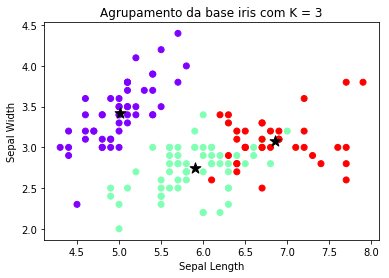

In [41]:
plt.scatter(iris.data[:,0], iris.data[:,1], c=cluster, cmap='rainbow')  
plt.scatter(centroides[:,0], centroides[:,1], marker = '*', s=130, color='black')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Agrupamento da base iris com K = 3')
plt.show()

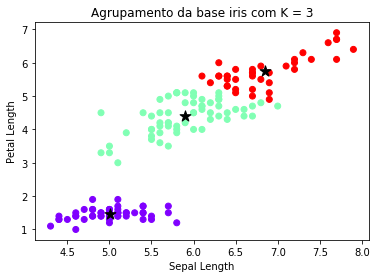

In [42]:
plt.scatter(iris.data[:,0], iris.data[:,2], c=cluster, cmap='rainbow')  
plt.scatter(centroides[:,0], centroides[:,2], marker = '*', s=130, color='black')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Agrupamento da base iris com K = 3')
plt.show()

### Experimentos usando a base de dados Boston

In [36]:
boston = datasets.load_boston()
dataset = boston.data

print(boston.DESCR)

K = 3 # quantidade de clusters
centroides = generate_centroid(K, dataset)
cluster = k_means(dataset, centroides, K)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

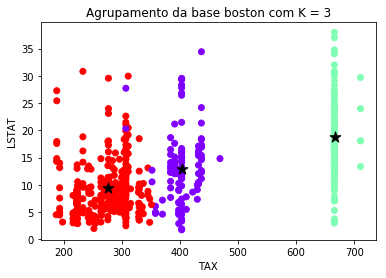

In [37]:
plt.scatter(boston.data[:,9], boston.data[:,12], c=cluster, cmap='rainbow')  
plt.scatter(centroides[:,9], centroides[:,12], marker = '*', s=130, color='black')
plt.xlabel(boston.feature_names[9])
plt.ylabel(boston.feature_names[12])
plt.title('Agrupamento da base boston com K = 3')
plt.show()

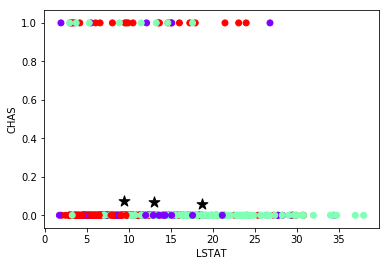

In [38]:
plt.scatter(boston.data[:,12], boston.data[:,3], c=cluster, cmap='rainbow')  
plt.scatter(centroides[:,12], centroides[:,3], marker = '*', s=130, color='black')
plt.xlabel(boston.feature_names[12])
plt.ylabel(boston.feature_names[3])
plt.show()

### Referências

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/